An example of how to propagate flux generated at the annihilation/decay spot. 

#Author: Q.R Liu

#Make sure you can run nuSQUIDs

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
import propa
import physicsconstants as PC
pc = PC.PhysicsConstants()

First we construct the object

In [3]:
#info of DM
channel = 'WW'
mass    = 1000.
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin  = 1.
Emax  = mass
nodes = 100
bins  = 300

#info of oscillation parameters
theta_12   = 33.58
theta_13   = 9.12
theta_23   = 40.4
delta_m_12 = 7.58e-5
delta_m_13 = 2.35e-3
delta      = 222


#linear binning 
logscale = False #default
#include interactions
interactions = True #default

#construct the flux object.
Flux = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta)

First we can plot the $\nu_\mu$ flux at production. (flavors: nu_e, nu_e_bar, nu_mu, nu_mu_bar, nu_tau, nu_tau_bar) 

Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5
Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5
Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5


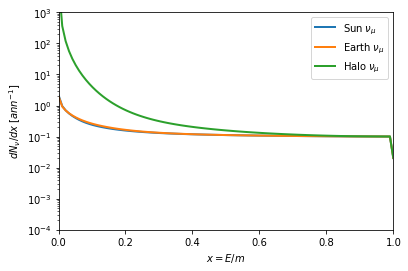

In [4]:
flux_ini_sun   = Flux.iniFlux('Sun')
flux_ini_earth = Flux.iniFlux('Earth')
flux_ini_Halo  = Flux.iniFlux('Halo')


x = Flux.iniE()/mass
plt.plot(x,flux_ini_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\nu_\mu$')
plt.plot(x,flux_ini_earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_ini_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

## Make coomparison plots

In [5]:
flux_ini_Halo['nu_mu']

array([7.94808924e+03, 3.63950617e+02, 1.19335077e+02, 5.66915683e+01,
       3.19218248e+01, 1.98633091e+01, 1.32210340e+01, 9.24372370e+00,
       6.71299996e+00, 5.02767173e+00, 3.86482462e+00, 3.03825297e+00,
       2.43548603e+00, 1.98660869e+00, 1.64612195e+00, 1.38366886e+00,
       1.17855033e+00, 1.01578786e+00, 8.85242145e-01, 7.79274748e-01,
       6.92373821e-01, 6.20539818e-01, 5.60571439e-01, 5.10082011e-01,
       4.67281893e-01, 4.30605603e-01, 3.99115013e-01, 3.71794969e-01,
       3.48002606e-01, 3.27195948e-01, 3.08808203e-01, 2.92521994e-01,
       2.78030633e-01, 2.65023048e-01, 2.53333059e-01, 2.42806084e-01,
       2.33239602e-01, 2.24519683e-01, 2.16560867e-01, 2.09268679e-01,
       2.02543418e-01, 1.96331112e-01, 1.90584714e-01, 1.85252580e-01,
       1.80275918e-01, 1.75625239e-01, 1.71275565e-01, 1.67203680e-01,
       1.63380154e-01, 1.59784026e-01, 1.56397430e-01, 1.53202995e-01,
       1.50185938e-01, 1.47331063e-01, 1.44626732e-01, 1.42062797e-01,
      

Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5


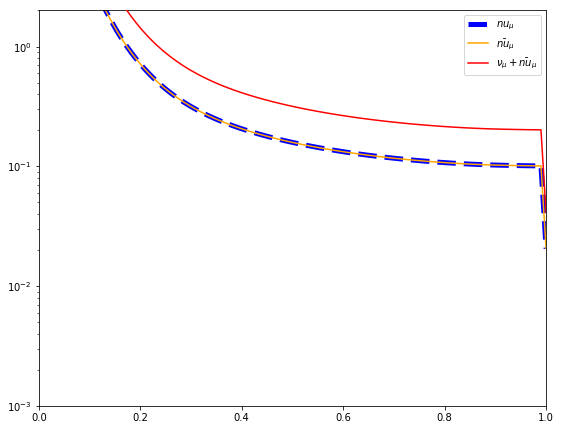

In [6]:
#info of DM
channel = 'WW'
mass    = 1000.
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin  = 1.
Emax  = mass
nodes = 100
bins  = 300

#info of oscillation parameters
theta_12   = 33.58
theta_13   = 9.12
theta_23   = 40.4
delta_m_12 = 7.58e-5
delta_m_13 = 2.35e-3
delta      = 222


#linear binning 
logscale = False #default
#include interactions
interactions = True #default

#construct the flux object.
Flux = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta)

fig, ax = plt.subplots(1, figsize=(10/1.1,8/1.1))

flux_ini_Halo  = Flux.iniFlux('Halo')
x = Flux.iniE()/mass


plt.plot(x, flux_ini_Halo['nu_mu'], color='blue', ls='--', lw=5, zorder=0, label=r'$nu_{\mu}$')
plt.plot(x, flux_ini_Halo['nu_mu_bar'], color='orange', zorder=1, label=r'$\bar{nu}_{\mu}$')
plt.plot(x, flux_ini_Halo['nu_mu']+flux_ini_Halo['nu_mu_bar'], color='red', zorder=3, label=r'$\nu_{\mu}+\bar{nu}_{\mu}$')

plt.legend()
plt.xlim(0,1)
plt.ylim(1e-3, 2)
plt.semilogy()

plt.show()

propagate the flux

In [7]:
t0 = time.time()
flux_det_sun = Flux.Sun('detector',zenith=np.pi/6.,avg=True)
print 'from Sun center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Earth = Flux.Earth('detector', avg=True)
print 'from Earth center to Earth surface, time duration:'
print time.time()-t0, 's'

t0 = time.time()
flux_det_Halo = Flux.Halo('detector',zenith=np.pi)
print 'averaged propagation, time duration:'
print time.time()-t0, 's'

Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5
/mnt/lfs7/user/jlazar/charon/charon/xsec/nusigma_
from Sun center to Earth surface, time duration:
272.137559175 s
Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5
/mnt/lfs7/user/jlazar/charon/charon/xsec/nusigma_
from Earth center to Earth surface, time duration:
21.0407321453 s
Initial Flux Loading: /mnt/lfs7/user/jlazar/charon/charon/data/SpectraEW.hdf5
/mnt/lfs7/user/jlazar/charon/charon/xsec/nusigma_
averaged propagation, time duration:
25.9060709476 s


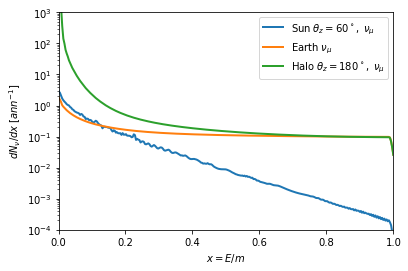

In [8]:
x = flux_det_sun['Energy']/mass
plt.plot(x,flux_det_sun['nu_mu'],linewidth=2.0,label=r'${\rm{Sun}}\;\theta_z=60^\circ,\;\nu_\mu$')
plt.plot(x,flux_det_Earth['nu_mu'],linewidth=2.0,label=r'${\rm{Earth}}\;\nu_\mu$')
plt.plot(x,flux_det_Halo['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\theta_z=180^\circ,\;\nu_\mu$')

plt.ylim(1e-4,1e3)
plt.yscale('log')
plt.xlim(0.0,1.0)
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

Then we show propagating external flux at 1000 GeV through bb channel to SunSurface and 1AU. The external flux should be in dat file with 7 columns corresponding to $E_\nu,\; \nu_e,\;\bar{\nu}_e,\;\nu_\mu,\;\bar{\nu}_\mu,\;\nu_\tau,\;\bar{\nu}_\tau$.

Initial Flux Loading: /data/user/qliu/DM/DMFlux/Pythia/no_EW/Sun/results/bb_1000_Sun.dat
Initial Flux Loading: /data/user/qliu/DM/DMFlux/Pythia/no_EW/Sun/results/bb_1000_Sun.dat
/mnt/lfs7/user/jlazar/charon/charon/xsec/nusigma_
Initial Flux Loading: /data/user/qliu/DM/DMFlux/Pythia/no_EW/Sun/results/bb_1000_Sun.dat
/mnt/lfs7/user/jlazar/charon/charon/xsec/nusigma_


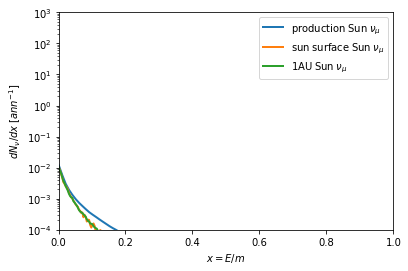

In [10]:
#path to the external flux file
path = '/data/user/qliu/DM/DMFlux/Pythia/no_EW/Sun/results/bb_1000_Sun.dat'
Flux_external = propa.NuFlux(channel,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathFlux=path)

flux_ini_sun_external   = Flux_external.iniFlux('Sun')
flux_sfc_sun_external   = Flux_external.Sun('SunSurface',avg=True)
flux_AU_sun_external    = Flux_external.Sun('1AU',avg=True)


x = Flux_external.iniE()/mass
plt.plot(x,flux_ini_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{production\;Sun}}\;\nu_\mu$')
plt.plot(flux_sfc_sun_external['Energy']/mass,flux_sfc_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{sun\;surface\;Sun}}\;\nu_\mu$')
plt.plot(flux_AU_sun_external['Energy']/mass,flux_AU_sun_external['nu_mu'],linewidth=2.0,label=r'${\rm{1AU\;Sun}}\;\nu_\mu$')



plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

We can also read external cross section files by setting

$NuFlux(xsec = path\_to\_xsec\_files)$ when constructing the flux object. 

xsec files should include energy differential cross sections in $n\_dsde\_CC.dat$, $n\_dsde\_NC.dat$, $p\_dsde\_CC.dat$, $p\_dsde\_NC.dat$ 

and total cross sections in $n\_sigma\_CC.dat$, $n\_sigma\_NC.dat$, $p\_sigma\_CC.dat$, $p\_sigma\_NC.dat$.

Other Sun/Earth models are also applicable by setting

$NuFlux(pathModel = path\_to\_model\_file)$ when constructing the flux object. 

The model file should have the same format as the Sun/Earth model file in $../propagate/models/$.

================================================================================

End. ヾ(๑╹ꇴ◠๑)ﾉ" 